In [91]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('Training.csv')


# 'fluid_overload' 都為0，Unnamed: 133 都 NA
data = data.drop(['fluid_overload','Unnamed: 133'],axis=1)

#刪除 相關係數=1.0
data = data.drop(['throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','enlarged_thyroid','enlarged_thyroid',
                  'brittle_nails','congestion','increased_appetite','receiving_blood_transfusion','coma','slurred_speech']
                 ,axis=1)
#刪除 相關係數=0.9
data = data.drop(['weight_gain','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','cramps','bruising','swollen_legs',
                 'cold_hands_and_feets','puffy_face_and_eyes','anxiety','knee_pain','spinning_movements','bladder_discomfort',
                  'passage_of_gases','weakness_of_one_body_side','toxic_look_(typhos)','mood_swings','irregular_sugar_level',
                  'yellow_urine','acute_liver_failure','swelling_of_stomach','distention_of_abdomen', 'history_of_alcohol_consumption',
                  'blister','red_sore_around_nose','small_dents_in_nails','silver_like_dusting','swollen_blood_vessels',
                  'drying_and_tingling_lips','swelling_joints','skin_peeling'],axis=1)
#刪除 0.9 以上
data = data.drop(['patches_in_throat','foul_smell_of urine','blackheads'],axis=1)

#sum()
data = data.drop(['pus_filled_pimples','unsteadiness','chest_pain','vomiting'],axis=1)

data.shape

(4920, 83)

In [92]:
# test=pd.DataFrame()
# for i in set(data['prognosis']):
#     data1=data[data['prognosis']==i].sample(n=36)
#     test=pd.concat([test,data1],axis=0)
# test=test.sample(n=1476)
# data=data.drop(test.index,axis=0)
# X_test=test.drop(['prognosis'],axis=1)
# y_test=test['prognosis']
# X_train=data.drop(['prognosis'],axis=1)
# y_train=data['prognosis']

In [93]:
test=data.sample(n=1476)
data=data.drop(test.index,axis=0)
X_test=test.drop(['prognosis'],axis=1)
y_test=test['prognosis']
X_train=data.drop(['prognosis'],axis=1)
y_train=data['prognosis']

In [94]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# # 假設X是你的特徵矩陣，y_encoded是編碼後的目標變量
# X = data.drop('prognosis', axis=1)  # 'target'是目標變量列名，如果不同請更改
# y = data['prognosis']

# # 初始化LabelEncoder
# label_encoder = LabelEncoder()

# # 擬合並轉換目標變量
# y_encoded = label_encoder.fit_transform(y)
# data['y_encoded']=y_encoded
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
# 擬合LabelEncoder到目標變量y
label_encoder.fit(y)

# 獲取標籤及其對應的編碼
labels = label_encoder.classes_
label_encoding = {label: index for index, label in enumerate(labels)}

print("標籤與其對應的數值:", label_encoding)

標籤與其對應的數值: {'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


# SVM模型訓練

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import time
time1=time.time()
svm_model = SVC(kernel='rbf', C=0.25,gamma='auto')                                      # 這裡使用非線性核，C是正則化參數
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')                          # 因是多分類須加參數 'weighted' 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
time2=time.time()
time3=time2-time1
print("Accuracy :{}".format(accuracy))
print("Precision:{}".format(precision))
print("Recall   :{}".format(recall))
print("F1-Score :{}".format(f1))
print(time3)

Accuracy :0.9966124661246613
Precision:0.9969728420688462
Recall   :0.9966124661246613
F1-Score :0.9965916101365108
0.41354870796203613


In [90]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[40  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 35]]


In [62]:
y_pred =svm_model.predict(X_test)
y_pred

array(['Hepatitis C', 'Cervical spondylosis', 'Malaria', ...,
       'Chicken pox', 'Common Cold', 'Drug Reaction'], dtype=object)

# 分類報告

In [63]:
from sklearn.metrics import classification_report
y_pred =svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        28
                                   AIDS       1.00      1.00      1.00        32
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        44
                                Allergy       1.00      1.00      1.00        51
                              Arthritis       1.00      1.00      1.00        38
                       Bronchial Asthma       1.00      1.00      1.00        43
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        39
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        41
                           

# 混淆矩陣（Confusion Matrix）繪圖

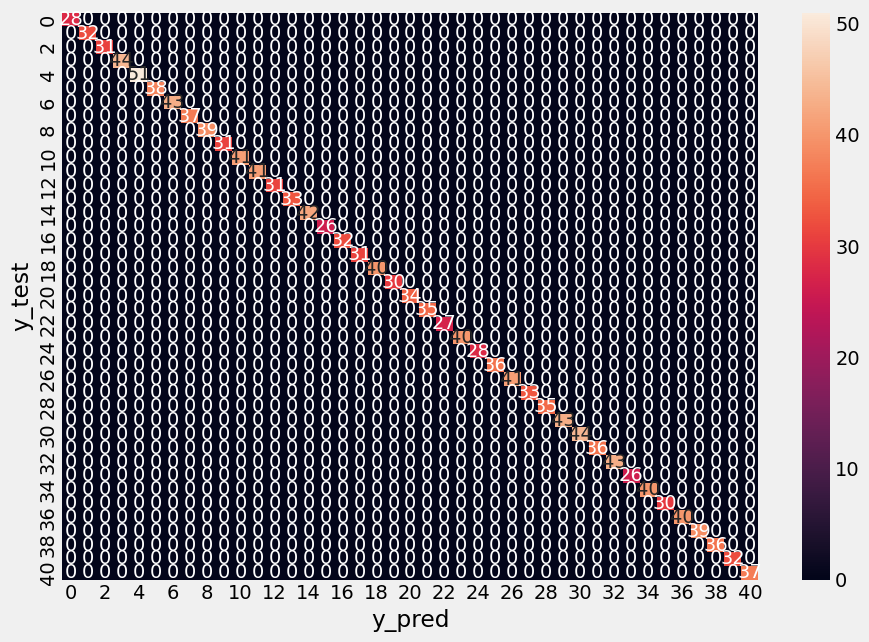

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True)

plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()


# 驗證

In [72]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
param_range = np.logspace(-4, 4, 9)
train_scores, valid_scores = validation_curve(
    SVC(), 
    data.drop(['prognosis'],axis=1), data['prognosis'], param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)


In [79]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
valid_scores_mean

array([0.57113821, 0.68211382, 0.81727642, 0.8398374 , 0.97560976,
       1.        , 1.        , 1.        , 1.        , 1.        ])

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

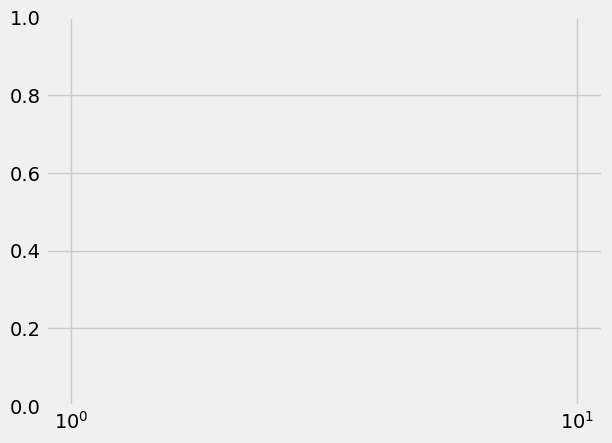

In [80]:
import matplotlib.pyplot as plt
plt.semilogx(param_range, train_scores_mean, 
             label="Training score", color="r", 
             marker='o')
plt.fill_between(param_range, 
                 train_scores_mean-train_scores_std,
                 train_scores_mean+train_scores_std, 
                 alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, 
             label="Validation score", color="g", 
             marker='^')
plt.fill_between(param_range, 
                 valid_scores_mean-valid_scores_std,
                 valid_scores_mean+valid_scores_std, 
                 alpha=0.2, color="g")
plt.legend(loc='lower right')
plt.title('SVM')
plt.xlabel('Hyperparameter C')
plt.ylabel('Score')
plt.tight_layout()

In [ ]:
max_index = np.argmax(valid_scores_mean)
best_C = param_range[max_index]
print("Best C value:", best_C)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.semilogx(param_range, train_scores_mean, label="Training score", color="r", lw=2, marker='o')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, label="Validation score", color="g", lw=2, marker='o')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="g")

plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Score')

# Use ScalarFormatter to ensure that the y-axis values are not in scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.show()


# 學習曲線

In [78]:
import numpy as np
from sklearn.model_selection import learning_curve

size = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, valid_scores = \
    learning_curve(estimator=svm_model,
                   X=data.drop(['prognosis'],axis=1), y=data['prognosis'],
                   train_sizes=size,
                   cv=10, n_jobs=-1)

In [81]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

最大平均值 : 1.0
所需的訓練樣本 : 2656


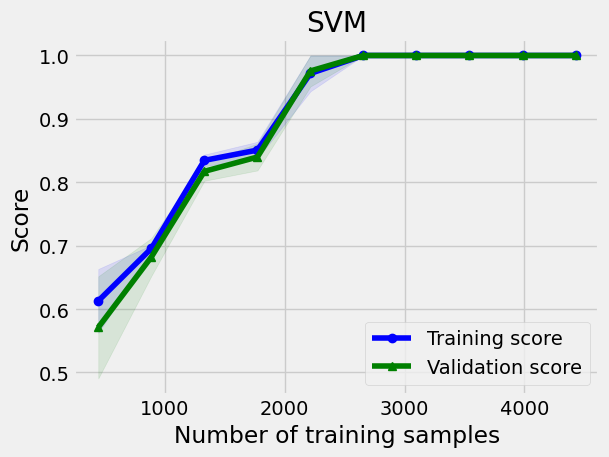

In [82]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
plt.title('SVM')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")

In [ ]:
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均驗證分數為: {max_valid_score}")
print(f"對應的訓練集大小（即'y'的數量）為: {optimal_train_size}")

In [ ]:
from sklearn.model_selection import GridSearchCV

Turning_parameter = {'C':np.arange(.01, 2, .01)}
DecisionTree = GridSearchCV(SVC(), Turning_parameter)

DecisionTree.fit(X_train, y_train)
print('beast_C:',DecisionTree.best_params_)  
print('beast_C_score:',DecisionTree.score(X_test, y_test)) 

In [78]:
for i in range(0,10,0.1):
    print(i)

TypeError: 'float' object cannot be interpreted as an integer